In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
def plot_column(df, title):
    plt.hist(df[title], bins=100)
    plt.title(title)
    plt.show()

In [24]:
df = pd.read_csv("./data/booking.csv")

# pre-processing
df = df[df['repeated'] == 0]
df = df[df['P-C'] == 0]
df = df[df['P-not-C'] == 0]
df = df[df['car parking space'] == 0]
df = df[df['number of children'] == 0]

df = df.drop(columns=["Booking_ID", "date of reservation", "repeated", "P-C", "P-not-C", "car parking space", "number of children"])

df['type of meal'] = pd.factorize(df['type of meal'])[0]
df['room type'] = pd.factorize(df['room type'])[0]
df['market segment type'] = pd.factorize(df['market segment type'])[0]
df['booking status'] = pd.factorize(df['booking status'])[0]

# canceled -> 1

df

,number of adults,number of weekend nights,number of week nights,type of meal,room type,lead time,market segment type,average price,special requests,booking status
1,1,1,3,0,0,5,0,106.68,1,0
3,1,0,2,1,0,211,0,100.00,1,1
4,1,1,2,0,0,48,0,77.00,0,1
5,1,0,2,2,0,346,1,100.00,1,1
7,3,1,3,1,1,83,0,105.61,1,0
...,...,...,...,...,...,...,...,...,...,...
36280,2,0,2,2,0,346,0,115.00,1,1
36281,2,1,3,1,0,34,0,107.55,1,0
36282,2,1,3,1,1,83,0,105.61,1,0
36283,3,0,4,1,0,121,1,96.90,1,0


In [7]:
# null kontrolu
null_rows = df.isnull().any(axis=1)
print(null_rows.sum())

0


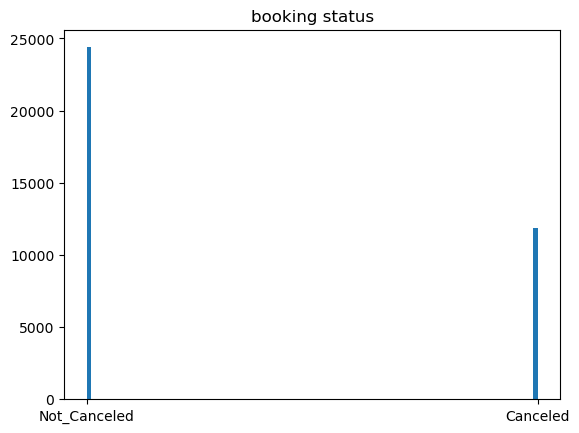

In [23]:
plot_column(df, "booking status")

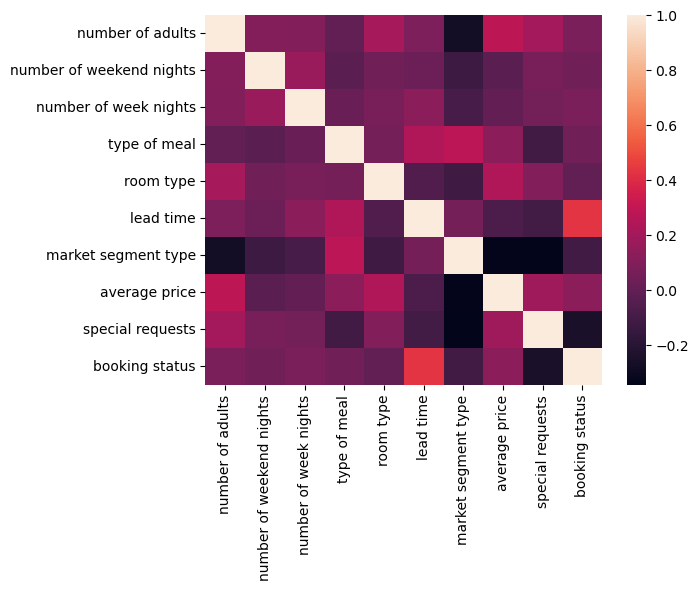

number of adults            0.074119
number of weekend nights    0.049520
number of week nights       0.074271
type of meal                0.047000
room type                  -0.002810
lead time                   0.430793
market segment type        -0.110829
average price               0.131809
special requests           -0.249261
booking status              1.000000
Name: booking status, dtype: float64

In [26]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix)
plt.show()

corr_matrix["booking status"]

In [ ]:
lead_time_for_cancelled = df.loc[df['booking status'] == 1, 'lead time']
lead_time_for_not_cancelled = df.loc[df['booking status'] == 0, 'lead time']

In [ ]:
max(df["lead time"])

In [ ]:
# Create density plots for the two arrays
sns.kdeplot(lead_time_for_cancelled, label='Cancelled', shade=True)
sns.kdeplot(lead_time_for_not_cancelled, label='Not Cancelled', shade=True)

# Add labels and a legend
plt.xlabel('Lead Time')
plt.ylabel('Density')
plt.legend()

plt.xlim(0, max(df["lead time"]))

# Show the plot
plt.show()

In [ ]:
# ML models

In [ ]:
df_X = df.drop(columns=["booking status"])
df_Y = df["booking status"]

X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.2, train_size=0.8, shuffle=True, random_state=5)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris  # You can replace this with your own dataset
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
}

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame(columns=["Classifier", "Accuracy"])

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results_df = results_df.append({"Classifier": clf_name, "Accuracy": accuracy}, ignore_index=True)

print(results_df)

In [ ]:
results_df

In [ ]:
random_elements = df_X.sample(n=2)
clf.predict(random_elements)

In [ ]:
# gelecek olan customerları 5 kümeye ayır. yeni gelen 0 olan müşteriyi ilgili kümeye at, bu kümenin average lead timenı bul.

X_train_no_lead_time = X_train.drop(columns=["lead time"])

indices = y_train[y_train == 0].index
X_train_only_notcancelled = X_train_no_lead_time.loc[indices]

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, MiniBatchKMeans, SpectralClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


clusterers = {
    'KMeans': KMeans(n_clusters=5),  # Adjust the number of clusters as needed
    'Agglomerative': AgglomerativeClustering(n_clusters=5),
    "MiniBatchKMeans": MiniBatchKMeans(n_clusters=5)
}

# DataFrame to store the results
results = pd.DataFrame(columns=['Model', 'Silhouette Score', 'Calinski-Harabasz Index', 'Davies-Bouldin Index'])

# Fit the models and compute the metrics
for name, clusterer in clusterers.items():
    # Fit the model
    labels = clusterer.fit_predict(X_train_only_notcancelled)

    # Compute metrics
    silhouette = silhouette_score(X_train_only_notcancelled, labels)
    calinski = calinski_harabasz_score(X_train_only_notcancelled, labels)
    davies = davies_bouldin_score(X_train_only_notcancelled, labels)

    # Append the results
    results = results.append({
        'Model': name,
        'Silhouette Score': silhouette,
        'Calinski-Harabasz Index': calinski,
        'Davies-Bouldin Index': davies
    }, ignore_index=True)

    print("bitti")

print(results)

In [89]:
random_elements = df_X.sample(n=1)
clf.predict(random_elements)


array([1], dtype=int64)

C:\Users\leonr\AppData\Local\Temp\ipykernel_17288\1023329292.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(points["lead time"], label='Not Cancelled', shade=True)


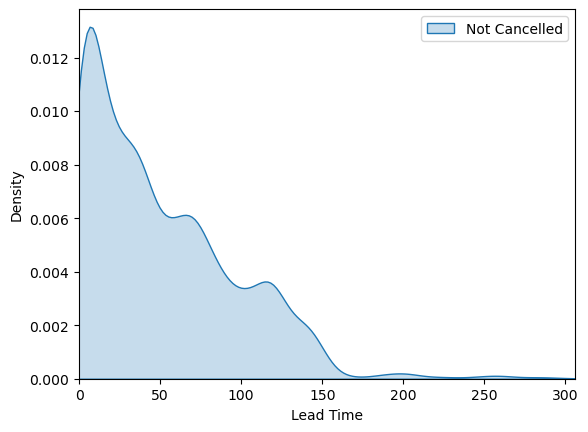

50.245897796530706


In [108]:
random_elements = random_elements.drop(columns=["lead time"])
cluster_index = clusterer.predict(random_elements)

cluster_labels = clusterer.labels_
cluster_data_points = X_train_only_notcancelled[cluster_labels == cluster_index]

points = X_train.loc[cluster_data_points.index]

lead_times_in_this_cluster = points["lead time"]

sns.kdeplot(points["lead time"], label='Not Cancelled', shade=True)

# Add labels and a legend
plt.xlabel('Lead Time')
plt.ylabel('Density')
plt.legend()

plt.xlim(min(lead_times_in_this_cluster), max(lead_times_in_this_cluster))

# Show the plot
plt.show()

print(np.mean(lead_times_in_this_cluster))

In [96]:
X_train.loc[random_elements.index]

,number of adults,number of weekend nights,number of week nights,type of meal,room type,lead time,market segment type,average price,special requests
21877,1,2,5,0,0,141,0,118.8,1


In [103]:
np.mean(lead_times_in_this_cluster)

50.245897796530706